# Data Dive 5
## Marketing Work for Food Delivery Service

### Kennidee Jones, Hayley Stanley, Bunker Brock, Nicholas Sartino

In [1]:
# Modules

#!pip install missingno
# Comment out if not needed - used briefly to export png images from bar graphs.
#!pip install plotly-orca
#!pip install -U kaleido
#!pip install geopandas

In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from shapely.geometry import Point


plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

import plotly.express as px
import plotly.io as pio

import missingno as msno

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import json


In [3]:
# Read data from multiple sources and concatenate data frames
df_test = (pd.read_csv('test.csv', header = 0))
df_train = (pd.read_csv('train.csv',header = 0))

df = pd.concat([df_test,df_train],ignore_index=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           56992 non-null  object 
 1   Delivery_person_ID           56992 non-null  object 
 2   Delivery_person_Age          56992 non-null  object 
 3   Delivery_person_Ratings      56992 non-null  object 
 4   Restaurant_latitude          56992 non-null  float64
 5   Restaurant_longitude         56992 non-null  float64
 6   Delivery_location_latitude   56992 non-null  float64
 7   Delivery_location_longitude  56992 non-null  float64
 8   Order_Date                   56992 non-null  object 
 9   Time_Orderd                  56992 non-null  object 
 10  Time_Order_picked            56992 non-null  object 
 11  Weatherconditions            56992 non-null  object 
 12  Road_traffic_density         56992 non-null  object 
 13  Vehicle_conditio

In [5]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,NaN
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,NaN
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,NaN
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian,NaN
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,NaN


In [6]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000
mean,17.034171,70.264920,17.486049,70.897002,1.024968
std,8.186784,22.861487,7.325665,21.034559,0.839171
min,-30.905562,-88.400467,0.010000,0.010000,0.000000
25%,12.933284,73.170283,12.989166,73.293329,0.000000
50%,18.551440,75.897429,18.636258,76.002471,1.000000
75%,22.728163,78.045359,22.785536,78.107053,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [7]:
# Get the count of NaN values for each column
na_counts = df.isna().sum()

print(na_counts)

ID                                 0
Delivery_person_ID                 0
Delivery_person_Age                0
Delivery_person_Ratings            0
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Order_Date                         0
Time_Orderd                        0
Time_Order_picked                  0
Weatherconditions                  0
Road_traffic_density               0
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
multiple_deliveries                0
Festival                           0
City                               0
Time_taken(min)                11399
dtype: int64


In [8]:
# Specify the columns of interest
columns_of_interest = ['Restaurant_latitude', 'Restaurant_longitude']

# Create an empty DataFrame to store rows with 0 values
zero_values_df = pd.DataFrame()

# Loop through columns and rows
for column in columns_of_interest:
    # Use boolean indexing to select rows where the value is 0
    zero_rows = df[df[column] == 0]
    
    # Concatenate the selected rows to the new DataFrame
    zero_values_df = pd.concat([zero_values_df, zero_rows], ignore_index=True)

# Display the new DataFrame
zero_values_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4946,VADRES04DEL01,22,4.6,0.0,0.0,0.11,0.11,08-03-2022,23:40:00,23:50:00,conditions Windy,Low,1,Drinks,scooter,NaN,No,Urban,NaN
1,0x4598,RANCHIRES14DEL03,35,4.8,0.0,0.0,0.06,0.06,01-04-2022,22:15:00,22:25:00,conditions Sunny,Low,2,Snack,scooter,0,No,Metropolitian,NaN
2,0x9bb,VADRES16DEL01,23,4.4,0.0,0.0,0.01,0.01,24-03-2022,10:20:00,10:30:00,conditions Windy,Low,0,Snack,motorcycle,0,No,Metropolitian,NaN
3,0xd05f,DEHRES02DEL01,30,4.7,0.0,0.0,0.11,0.11,14-02-2022,21:55:00,22:00:00,conditions Cloudy,Jam,0,Snack,motorcycle,2,No,Metropolitian,NaN
4,0xcb17,ALHRES06DEL02,25,4.9,0.0,0.0,0.02,0.02,17-02-2022,10:00:00,10:15:00,conditions Sunny,Low,1,Buffet,scooter,0,No,Metropolitian,NaN


In [9]:
# Drop these rows from the main dataframe because they make no sense

# Use boolean indexing to select rows where any of the specified columns have a value of 0
rows_to_drop = df[(df[columns_of_interest] == 0).any(axis=1)]

# Drop the selected rows from the original DataFrame
df = df.drop(rows_to_drop.index)

In [10]:
# Clean up negative lat/long values
negative_lat_long_columns = ['Delivery_location_latitude', 'Delivery_location_longitude','Restaurant_latitude', 'Restaurant_longitude']

# Convert negative values to positive equivalents
df[negative_lat_long_columns] = df[negative_lat_long_columns].abs()

In [11]:
# Create a feature for rows with no delivery lat/long and call it "Ate in Store"

# Specify the columns of interest
in_store_columns = ['Delivery_location_latitude', 'Delivery_location_longitude']

# Create a boolean mask for rows where both 'Delivery_location_latitude' and 'Delivery_location_longitude' are equal to 0
in_store_mask = (df[in_store_columns] < 70).all(axis=1)

# Create the 'In Store' column and set values based on the conditions
df['In Store'] = 'Delivery'  # Default value for all rows
df.loc[in_store_mask, 'In Store'] = 'In Store'

In [12]:
# Using pd.isna()
nan_rows = df[pd.isna(df['Time_taken(min)'])]

nan_rows.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),In Store
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,...,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,NaN,Delivery
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,...,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,NaN,Delivery
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,...,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,NaN,Delivery
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,...,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian,NaN,Delivery
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,...,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,NaN,Delivery


In [13]:
# Using pd.notna()
not_nan_rows = df[pd.notna(df['Time_taken(min)'])]

not_nan_rows.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),In Store
11399,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,Delivery
11400,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,Delivery
11401,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,Delivery
11402,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,Delivery
11403,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,Delivery


In [14]:
df.head(100)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),In Store
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,...,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,NaN,Delivery
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,...,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,NaN,Delivery
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,...,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,NaN,Delivery
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,...,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian,NaN,Delivery
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,...,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,NaN,Delivery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0xd0f4,LUDHRES01DEL02,24,4.8,30.873988,75.842739,30.893988,75.862739,13-02-2022,10:15:00,...,conditions Sandstorms,Low,1,Snack,motorcycle,NaN,No,Urban,NaN,Delivery
105,0x6e8c,INDORES010DEL02,27,4.6,22.750040,75.902847,22.800040,75.952847,30-03-2022,21:25:00,...,conditions Stormy,Jam,1,Buffet,motorcycle,0,No,Metropolitian,NaN,Delivery
106,0xa1ee,JAPRES20DEL02,36,4.3,26.956431,75.776649,26.976431,75.796649,19-03-2022,09:55:00,...,conditions Windy,Low,0,Buffet,motorcycle,1,No,Urban,NaN,Delivery
107,0x4720,PUNERES07DEL02,26,4.6,18.546947,73.900626,18.676947,74.030626,10-03-2022,23:00:00,...,conditions Stormy,Low,2,Buffet,electric_scooter,1,No,Metropolitian,NaN,Delivery


In [15]:
# Clean up Weather Values
column_to_modify = 'Weatherconditions'

# Remove the string 'condition' from each value in the specified column
df[column_to_modify] = df[column_to_modify].str.replace('conditions ', '', regex=False)


In [16]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),In Store
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,...,NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,NaN,Delivery
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,...,Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,NaN,Delivery
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,...,Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,NaN,Delivery
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,...,Fog,Medium,1,Meal,scooter,1,No,Metropolitian,NaN,Delivery
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,...,Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,NaN,Delivery


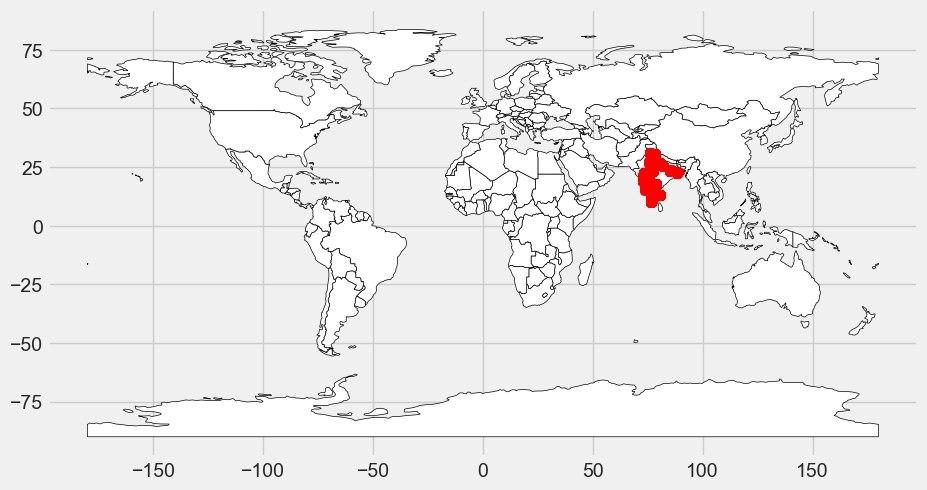

In [17]:
# Create a GeoDataFrame from the DataFrame by creating Point geometries
geometry = [Point(xy) for xy in zip(df['Delivery_location_longitude'], df['Delivery_location_latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), color='white', edgecolor='black')

# Plot the GeoDataFrame on top
geo_df.plot(ax=ax, color='red', marker='o', markersize=50)

# Display the plot
plt.show()

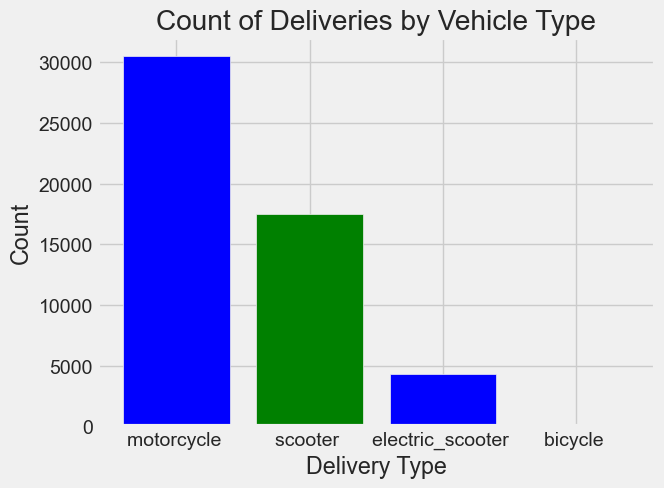

In [18]:
# Count the occurrences of each category in the 'In Store' column
traffic_counts = df['Type_of_vehicle'].value_counts()

# Create a bar chart
plt.bar(traffic_counts.index, traffic_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Delivery Type')
plt.ylabel('Count')
plt.title('Count of Deliveries by Vehicle Type')

# Show the plot
plt.show()

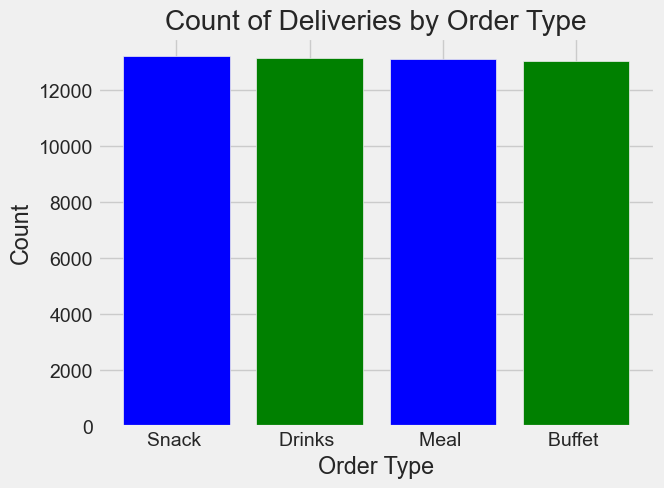

In [19]:
# Count the occurrences of each category in the 'In Store' column
order_counts = df['Type_of_order'].value_counts()

# Create a bar chart
plt.bar(order_counts.index, order_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Order Type')
plt.ylabel('Count')
plt.title('Count of Deliveries by Order Type')

# Show the plot
plt.show()

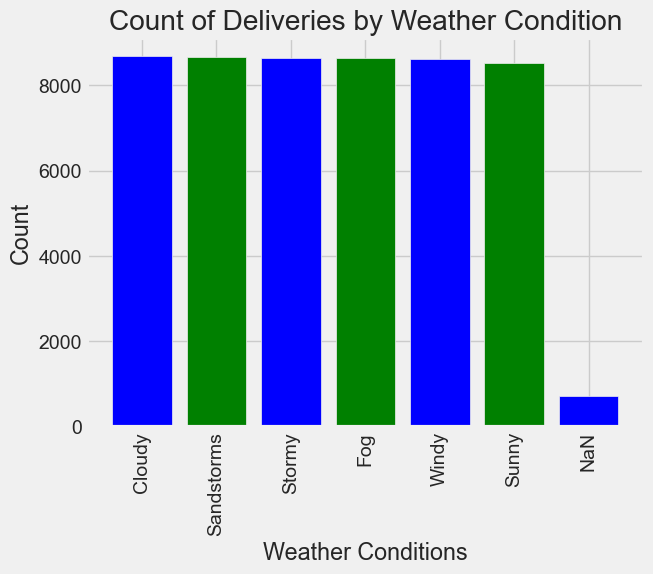

In [20]:
# Count the occurrences of each category in the 'Weatherconditions' column
weather_counts = df['Weatherconditions'].value_counts()

# Create a bar chart
plt.bar(weather_counts.index, weather_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.title('Count of Deliveries by Weather Condition')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [21]:
print(weather_counts)

Weatherconditions
Cloudy        8675
Sandstorms    8655
Stormy        8645
Fog           8644
Windy         8622
Sunny         8527
NaN            714
Name: count, dtype: int64


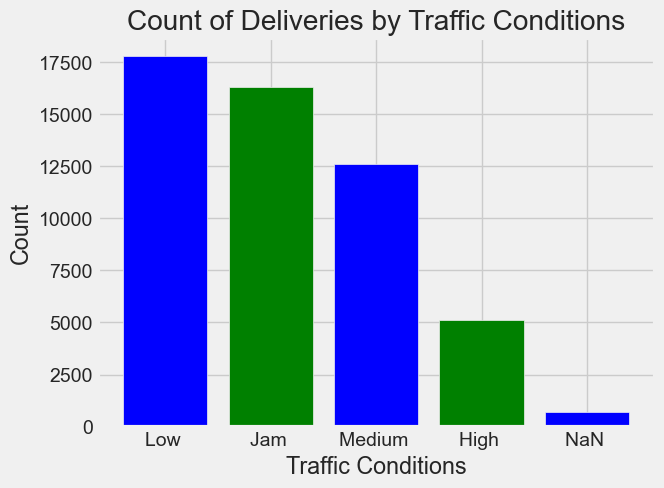

In [22]:
# Count the occurrences of each category in the 'Road_traffic_density' column
traffic_counts = df['Road_traffic_density'].value_counts()

# Create a bar chart
plt.bar(traffic_counts.index, traffic_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Traffic Conditions')
plt.ylabel('Count')
plt.title('Count of Deliveries by Traffic Conditions')

# Show the plot
plt.show()

In [24]:
import os
print(os.getcwd())

/Users/nicksartino/Code/Data-Dive-5


In [32]:
delivery = df.copy()

In [33]:
fp = 'india_state_geo.json'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry
0,105,IND,India,1,Andaman and Nicobar,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,None,None,State,State,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,None,Agence de la Frontire du Nord-Est(French-obsol...,State,State,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,None,None,State,State,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,None,None,State,State,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [34]:
merged = map_df.set_index('geometry').join(delivery.set_index('State'))

KeyError: "None of ['State'] are in the columns"

<Axes: >

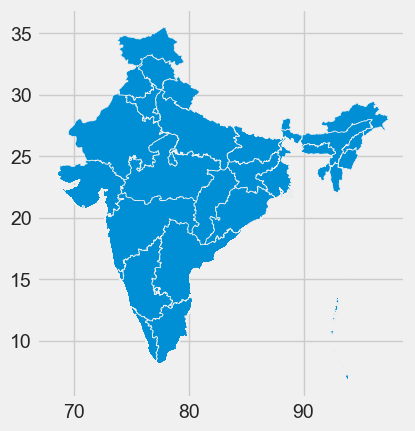

In [35]:
map_df.plot()

In [36]:
# import plotly.express as px

# fig= px.scatter_geo(delivery, lat=delivery['Delivery_location_latitude'], lon = delivery['Delivery_location_longitude'])
# fig.update_geos(fitbounds='locations', visible=False)
# fig2=px.scatter_geo(delivery, lat=delivery['Restaurant_latitude'], lon=delivery['Restaurant_longitude'])
# fig.show()

In [37]:
indian_states=json.load(open('india_state_geo.json'))

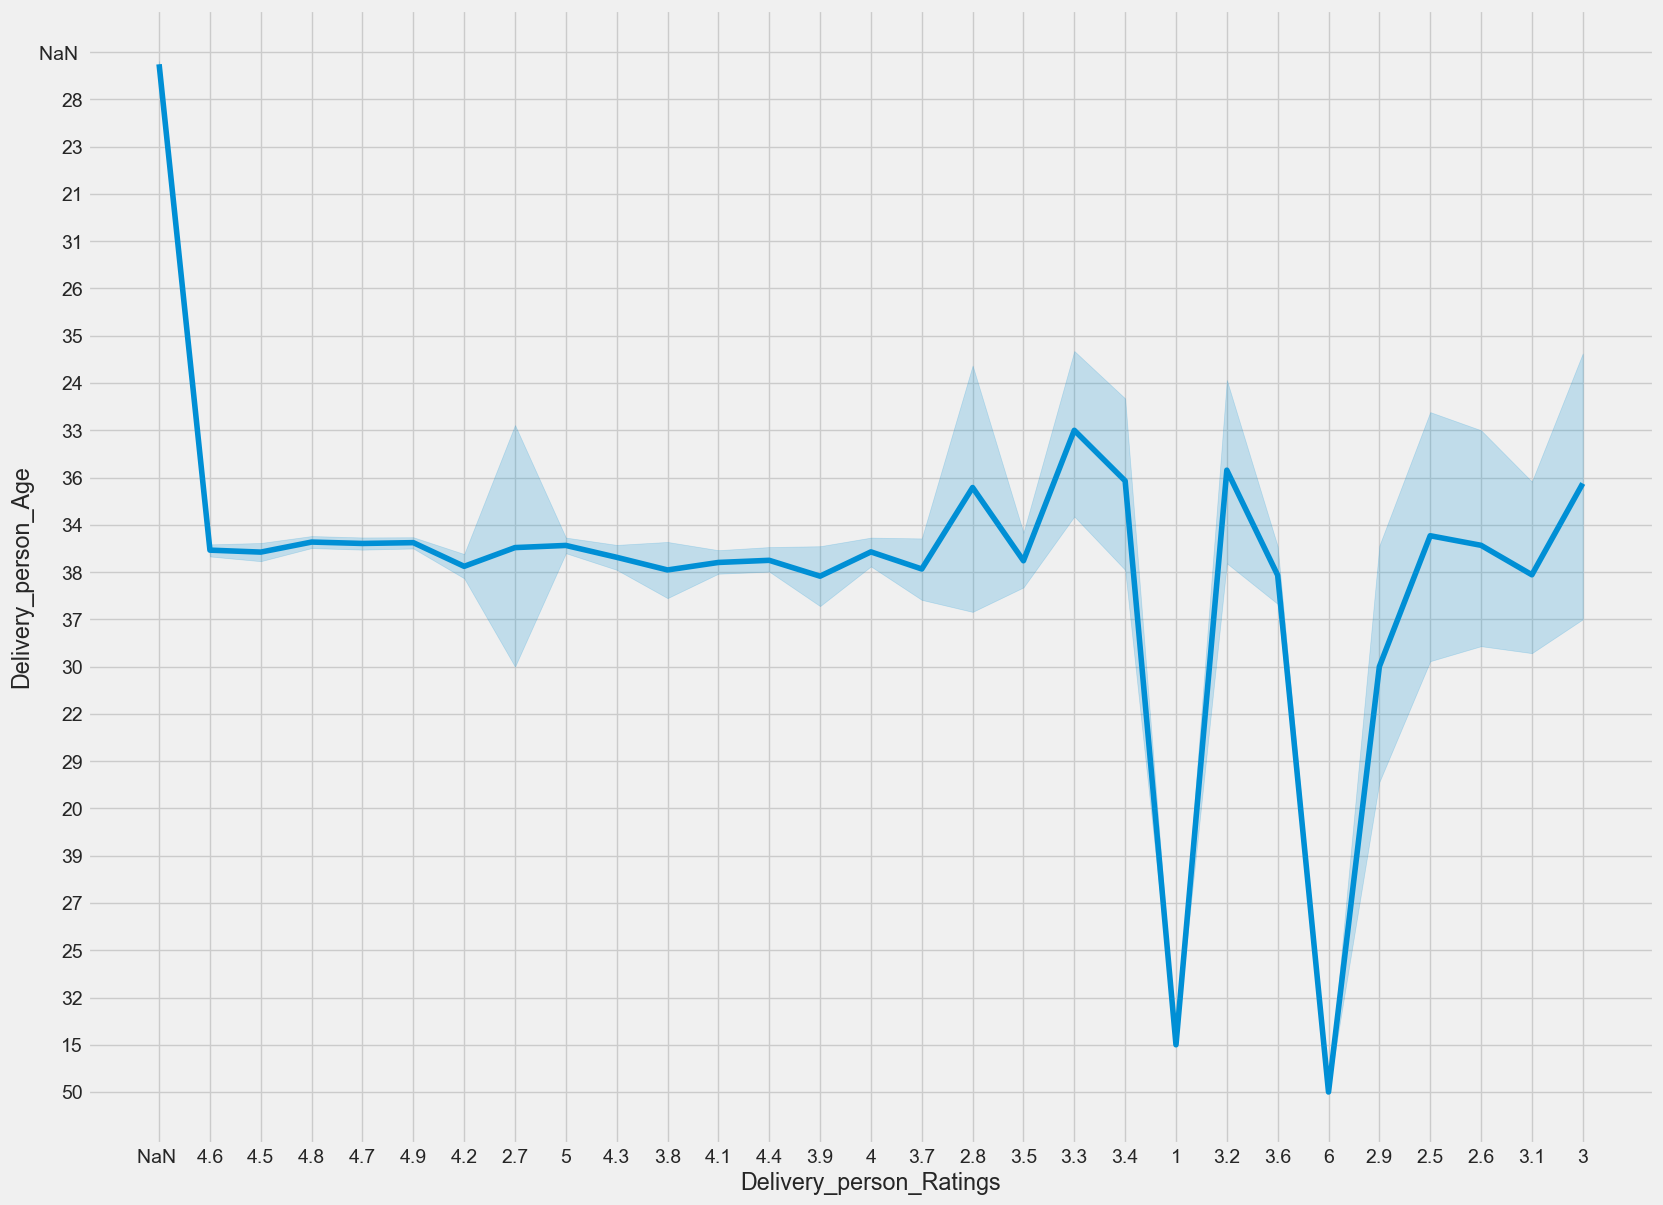

In [38]:
f, ax = plt.subplots(figsize=(18, 14))

sns.lineplot(x=delivery['Delivery_person_Ratings'], y=delivery['Delivery_person_Age'] ,data=delivery, palette='magma')
plt.show()

In [39]:
# Specify the columns of interest
columns_of_interest = ['Restaurant_latitude', 'Restaurant_longitude']

# Create an empty DataFrame to store rows with 0 values
zero_values_df = pd.DataFrame()

# Loop through columns and rows
for column in columns_of_interest:
    # Use boolean indexing to select rows where the value is 0
    zero_rows = delivery[delivery[column] == 0]
    
    # Concatenate the selected rows to the new DataFrame
    zero_values_df = pd.concat([zero_values_df, zero_rows], ignore_index=True)

# Display the new DataFrame
zero_values_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),In Store


In [40]:
#  Drop these rows from the main dataframe because they make no sense

# Use boolean indexing to select rows where any of the specified columns have a value of 0
rows_to_drop = delivery[(delivery[columns_of_interest] == 0).any(axis=1)]

# Drop the selected rows from the original DataFrame
delivery = delivery.drop(rows_to_drop.index)

In [41]:
delivery['Delivery_person_Ratings'].isnull().sum()

0

In [42]:

delivery_copy=delivery.copy(deep=True)
delivery_copy['Delivery_person_Ratings']= pd.to_numeric(delivery['Delivery_person_Ratings'])
bins=[0,1,2,3,4,5]
labels=['0-1','1-2','2-3','3-4','4-5']
delivery_copy['Delivery_person_Ratings']=pd.cut(delivery_copy['Delivery_person_Ratings'], bins=bins, labels=labels)

ValueError: Unable to parse string "NaN " at position 0

In [43]:
delivery['Delivery_person_Ratings'].dropna

<bound method Series.dropna of 0        NaN 
1         4.6
2         4.5
3         4.8
4         4.6
         ... 
56986     4.2
56987     4.8
56989     4.9
56990     4.7
56991     4.9
Name: Delivery_person_Ratings, Length: 52482, dtype: object>

In [44]:
# customize title
delivery['Delivery_person_Ratings'] = delivery['Delivery_person_Ratings'].astype('float')

def categorize_Ratings(Delivery_person_Ratings): 
    if Delivery_person_Ratings >0.1 and Delivery_person_Ratings <=1:
        return "Extremely Low"
    elif Delivery_person_Ratings>1 and Delivery_person_Ratings <=2.5:
        return "Low"
    elif Delivery_person_Ratings>2.5 and Delivery_person_Ratings <=4:
        return "Medium"
    else:
        return "High"
    
delivery['rating_level'] = delivery['Delivery_person_Ratings'].apply(categorize_Ratings)
delivery.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),In Store,rating_level
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,...,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,NaN,Delivery,High
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,...,Jam,0,Snack,motorcycle,1,No,Metropolitian,NaN,Delivery,High
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,...,Jam,0,Drinks,motorcycle,1,No,Metropolitian,NaN,Delivery,High
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,...,Medium,1,Meal,scooter,1,No,Metropolitian,NaN,Delivery,High
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,...,Medium,2,Drinks,scooter,1,No,Metropolitian,NaN,Delivery,High
5,0xc4af,GOARES04DEL01,26,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,09:45:00,...,Low,0,Drinks,motorcycle,1,No,Metropolitian,NaN,Delivery,High
6,0x3b9d,BANGRES19DEL02,23,4.8,12.914264,77.678400,12.934264,77.698400,01-04-2022,10:00:00,...,Low,2,Buffet,scooter,0,No,Urban,NaN,Delivery,High
7,0xdd42,KOLRES06DEL02,26,4.8,22.533662,88.366217,22.583662,88.416217,13-02-2022,18:00:00,...,Medium,0,Meal,motorcycle,1,No,Metropolitian,NaN,Delivery,High
8,0x872b,MYSRES05DEL03,35,4.9,12.323978,76.627961,12.413978,76.717961,02-03-2022,21:30:00,...,Jam,2,Snack,scooter,1,No,Metropolitian,NaN,Delivery,High
9,0x6001,HYDRES04DEL03,23,4.9,17.411028,78.329645,17.441028,78.359645,05-04-2022,20:45:00,...,Jam,1,Meal,motorcycle,0,No,Metropolitian,NaN,Delivery,High


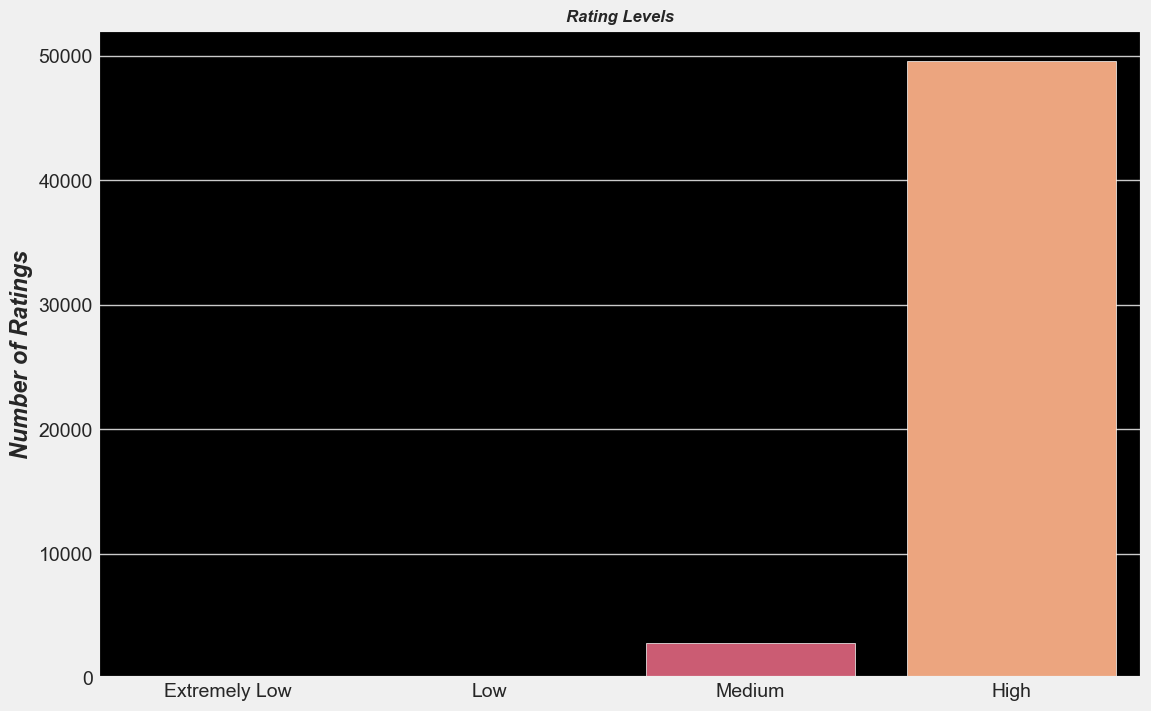

In [45]:
# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('white')

rating_order = ['Extremely Low', 'Low', 'Medium', 'High']

# plot of the different subjectivity levels
sns.countplot(x="rating_level", data=delivery, order=rating_order, palette="magma")
# customize title
ax.set_title('Rating Levels', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('', weight='bold', style='italic')
# customize y-axis label
ax.set_ylabel('Number of Ratings', weight='bold', style='italic')
# customize the y-axis label
ax.set_facecolor('black')
plt.show()

In [46]:
delivery['Delivery_person_Age'] = delivery['Delivery_person_Age'].astype('float')
def categorize_Ratings(Delivery_person_Age): 
    if Delivery_person_Age >15 and Delivery_person_Age <=20:
        return "15-18"
    elif Delivery_person_Age>20 and Delivery_person_Age <=29:
        return "20-29"
    elif Delivery_person_Age>29 and Delivery_person_Age <=50:
        return "30-40"
    else:
        return "41 and up"
delivery['age_level'] = delivery['Delivery_person_Age'].apply(categorize_Ratings)
delivery.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),In Store,rating_level,age_level
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,...,3,Drinks,electric_scooter,1,No,Metropolitian,NaN,Delivery,High,41 and up
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,...,0,Snack,motorcycle,1,No,Metropolitian,NaN,Delivery,High,20-29
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,...,0,Drinks,motorcycle,1,No,Metropolitian,NaN,Delivery,High,20-29
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,...,1,Meal,scooter,1,No,Metropolitian,NaN,Delivery,High,20-29
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,...,2,Drinks,scooter,1,No,Metropolitian,NaN,Delivery,High,30-40


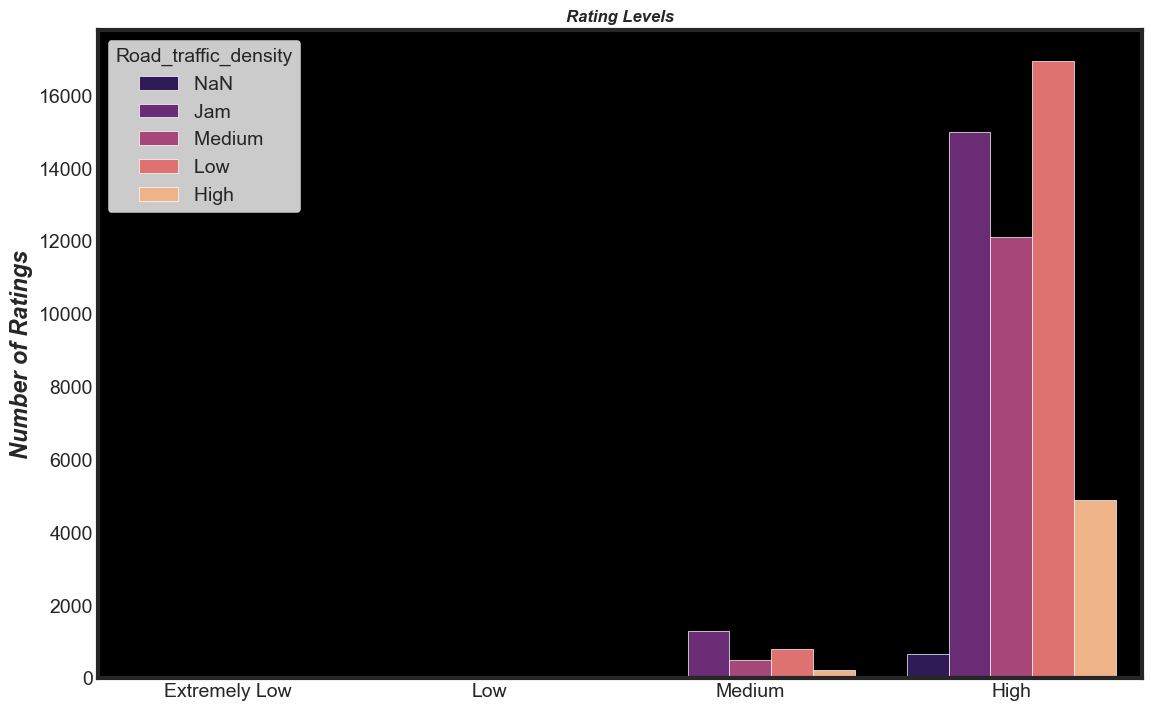

In [47]:
# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('white')

rating_order = ['Extremely Low', 'Low', 'Medium', 'High']

# plot of the different subjectivity levels
sns.countplot(x="rating_level", data=delivery, order=rating_order, palette="magma", hue='Road_traffic_density')
# customize title
ax.set_title('Rating Levels', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('', weight='bold', style='italic')
# customize y-axis label
ax.set_ylabel('Number of Ratings', weight='bold', style='italic')
# customize the y-axis label
ax.set_facecolor('black')
plt.show()

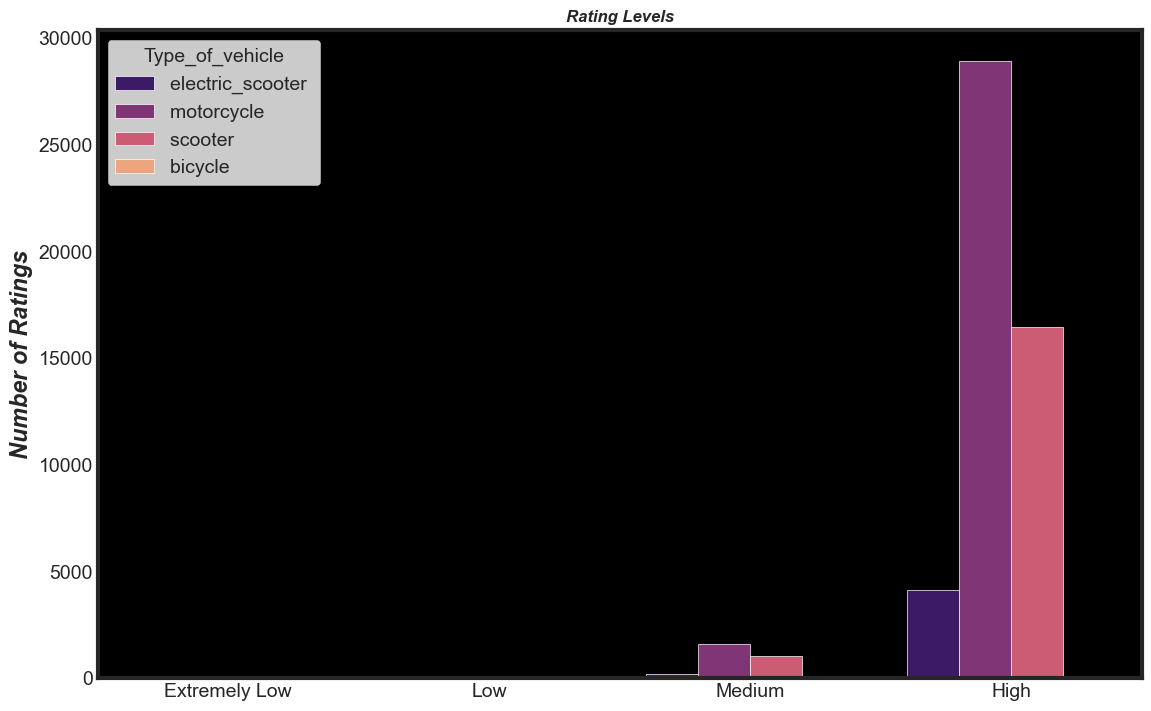

In [48]:
# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('white')

rating_order = ['Extremely Low', 'Low', 'Medium', 'High']

# plot of the different subjectivity levels
sns.countplot(x="rating_level", data=delivery, order=rating_order, palette="magma", hue='Type_of_vehicle')
# customize title
ax.set_title('Rating Levels', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('', weight='bold', style='italic')
# customize y-axis label
ax.set_ylabel('Number of Ratings', weight='bold', style='italic')
# customize the y-axis label
ax.set_facecolor('black')
plt.show()

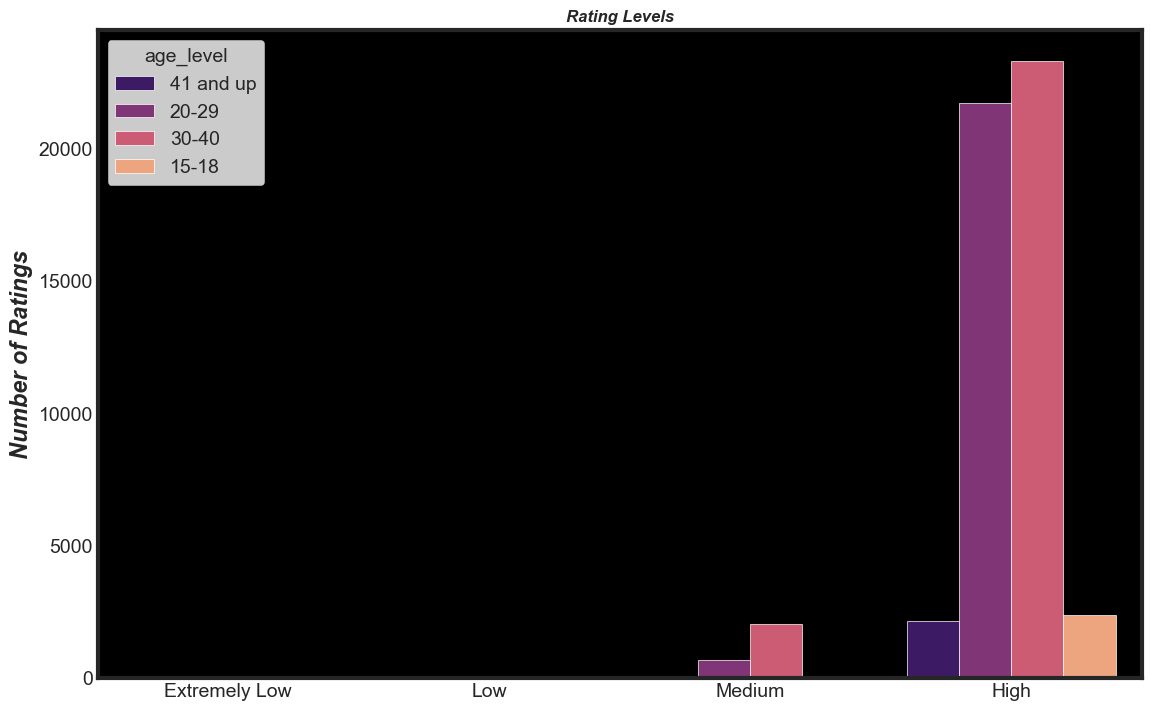

In [49]:
# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('white')

rating_order = ['Extremely Low', 'Low', 'Medium', 'High']

# plot of the different subjectivity levels
sns.countplot(x="rating_level", data=delivery, order=rating_order, palette="magma", hue='age_level')
# customize title
ax.set_title('Rating Levels', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('', weight='bold', style='italic')
# customize y-axis label
ax.set_ylabel('Number of Ratings', weight='bold', style='italic')
# customize the y-axis label
ax.set_facecolor('black')
plt.show()

In [50]:
delivery.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,50314.000000,50259.000000,52482.000000,52482.000000,52482.000000,52482.000000,52482.000000
mean,29.553146,4.632450,18.919592,76.920374,18.983309,76.984090,1.023456
std,5.807882,0.337308,5.470764,3.498164,5.472428,3.498432,0.838860
min,15.000000,1.000000,9.957144,72.768726,9.967144,72.778726,0.000000
25%,25.000000,4.500000,12.986047,73.897902,13.066286,73.940547,0.000000
50%,30.000000,4.700000,19.065838,76.618203,19.124049,76.662620,1.000000
75%,35.000000,4.900000,22.751234,78.368855,22.821226,78.405467,2.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000
